# Question 1

## (a)

Probability that x does not appear in the bootstrapped dataset is **$$\frac{(n-1)^k}{n^k}=(1-\frac{1}{n})^k$$** because we're creating bootstrapped dataset using sampling with replacement. 

## (b)

probability converge to **1** as n goes to infinity
$$(1-\frac{1}{n})^k=(1-\frac{1}{n})^n$$
$$\lim_{n\to\infty} (1-\frac{1}{n})^n = 1$$

It implys that larger dataset is, lower percentage of original dataset will be sampled. 

## (c)

$$\frac{(n-1)^{r^k}}{n^{r^k}}$$

# Question 2

## (a)

$$L_{LASSO}(\beta) = \frac{1}{n}\sum_{i=1}^{n} |y_i-\beta^{T}x_i|^2 + \lambda \sum_{j=1}^{J} |\beta_j| $$

$$Lasso(x_1)=\sum_{j=1}^{2} |x_{1j}|=4+5=9$$
$$Lasso(x_2)=\sum_{j=1}^{2} |x_{2j}|=2+2=4$$

LASSO regularization decrease from 9 to 4 when going from x1 to x2. 

## (b)
$$L_{Ridge}(\beta) = \frac{1}{n}\sum_{i=1}^{n} |y_i-\beta^{T}x_i|^2 + \lambda \sum_{j=1}^{J} \beta_j^2 $$
$$Ridge(x_1)=\sum_{j=1}^{2} (x_{1j})^2=4^2+5^2=41$$
$$Ridge(x_2)=\sum_{j=1}^{2} (x_{2j})^2=2^2+2^2=8$$

Ridge regularization decrease from 41 to 8 when going from x1 to x2.

## (c)
LASSO: The effect of absolute penalty is to drive some of the coefficients to **exactly zero**. As a result, Lasso regularization can be used for **feature selection**, as it tends to set the coefficients of irrelevant features to zero, effectively removing them from the model.

Ridge: Squared penalty term does not drive coefficients to exactly zero, but rather encourages them to **be small**. As a result, Ridge regularization can be used to **reduce the impact of multicollinearity**, which occurs when predictor variables are highly correlated with each other.

# Question 3

In [120]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [143]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

def draw_contour(x,y,clf, class_labels = ["Negative", "Positive"]):
    """
    Draws a contour line for the predictor
    
    Assumption that x has only two features. This functions only plots the first two columns of x.
    
    """
    
    X0, X1 = x[:, 0], x[:, 1]
    xx0, xx1 = make_meshgrid(X0,X1)
    
    plt.figure(figsize = (10,6))
    plot_contours(clf, xx0, xx1, cmap="PiYG", alpha=0.8)
    scatter=plt.scatter(X0, X1, c=y, cmap="PiYG", s=30, edgecolors="k")
    plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)

    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())

In [144]:
# Your code here - use draw_contour() for showing the Voronoi regions, the other functions are called inside it.
x = np.array([
    [1, 1],
    [4, 1],
    [2, 3],
    [3, 3],
    [3, 4],
    [5, 4],
    [6, 5],
    [4, 5]
])
y = [0,0,0,0,1,1,1,1]

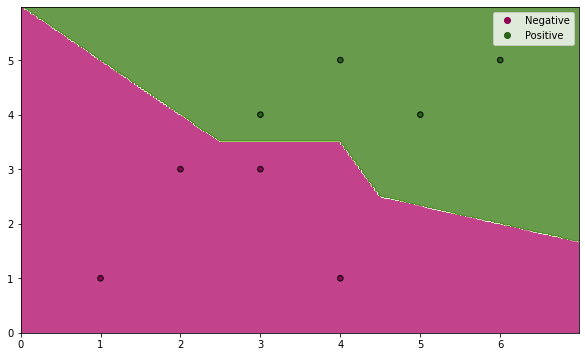

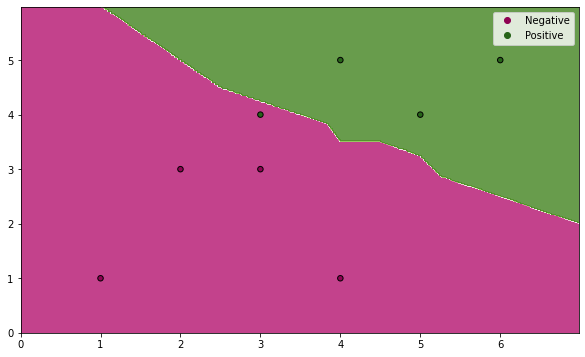

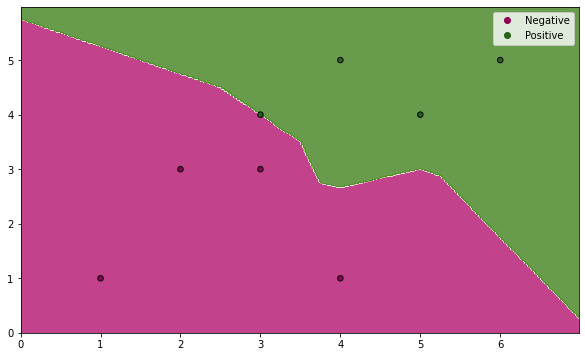

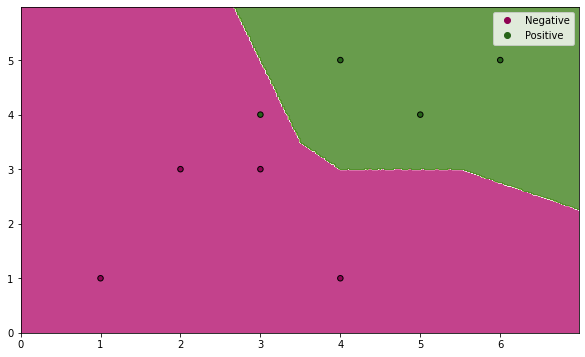

In [145]:
K = [1,2,3,4]
for i in K:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x, y)
    draw_contour(x, y, clf)

From above four plots, we can see that Voronoi region of negative class increase as K increase. 

It's because as K increase, complexity of model decrease and boundary become smoother which also has higher bias. It takes into account a greater number of neighboring data points, which tend to have similar class labels. 

# Question 4

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [151]:
def plot(beta0, beta1):
    plt.figure(figsize=(12, 8))
    x = np.linspace(-100, 100, 100)
    
    y=[]
    
    for i in beta0:
        for j in beta1:
            func = lambda x: 1/(1+np.exp(-i-j*x))
    
    y[i] = func(x)
    plt.plot(x, y[i], '-', color='pink')
    plt.show()

In [152]:
beta0=[2,10,1,1]
beta1=[1,2,10,5]
plot(beta0, beta1)

IndexError: list assignment index out of range

<Figure size 864x576 with 0 Axes>

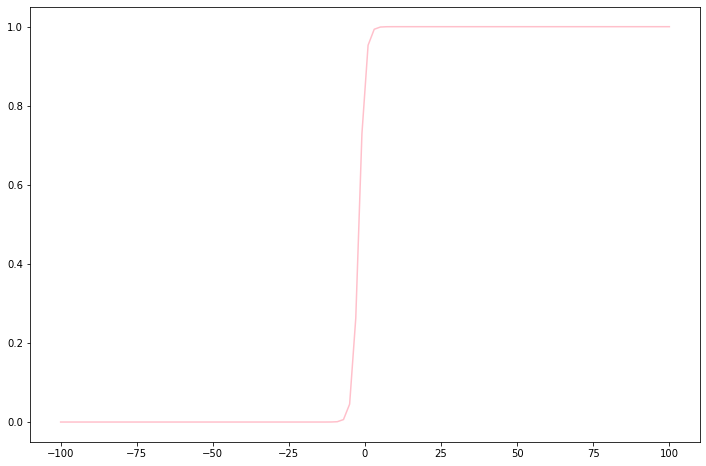

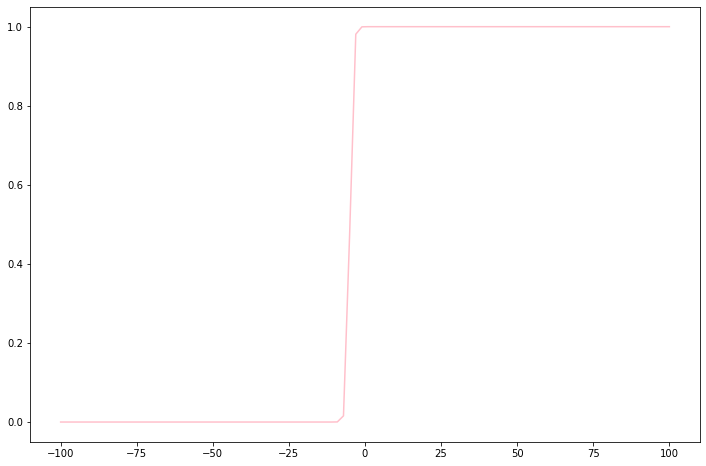

/var/folders/98/vwplyq_x2ddf8y2lpl0r0h7w0000gn/T/ipykernel_36430/853406815.py:8: RuntimeWarning: overflow encountered in exp
  func = lambda x: 1/(1+np.exp(-beta0-beta1*x))


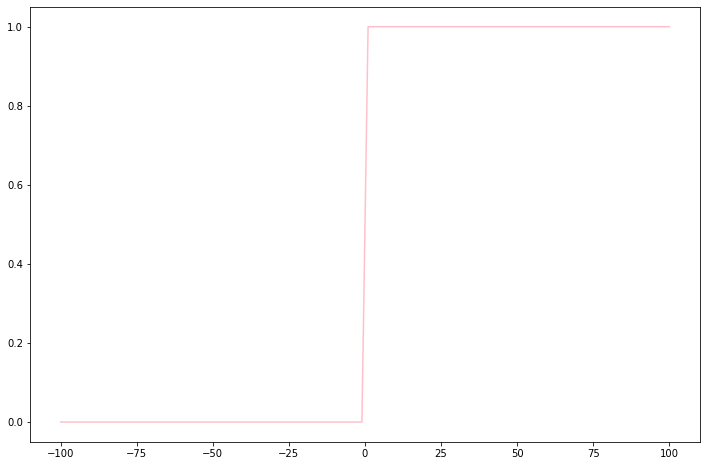

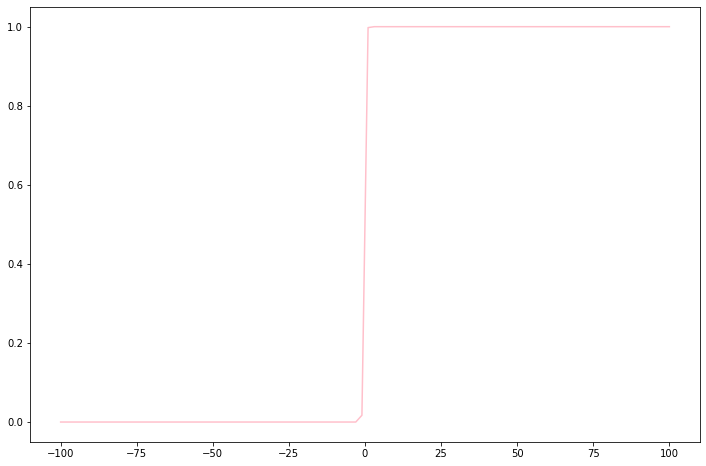

In [84]:
plot(2,1),
plot(10,2),
plot(1,10),
plot(1,5)

c is the most steeper one because it has highest slope $\beta_1$

# Question 5

## (a)

Ridge regression helps to reduce the impact of multicollinearity by shrinking the coefficients towards zero, which in turn reduces their variance and improves the stability of the model. This regularization technique can be particularly useful when dealing with datasets that have a large number of features or when the number of samples is relatively small compared to the number of features.

It also requires predictors be standarlized because they react to the units of measurement, since large numbers will play bigger role. 

## (b)

When $\lambda$ is bigger, the MSE term in the Ridge loss function will be insignificant and penalty will force $\beta_{ridge}$ to be close to **zero**

In [98]:
x5=np.linspace(0, 25, 50)
ridge_mse_test = []
for i in x5:
    temp = lambda i: i**2
    ridge_mse_test.append(temp(i))

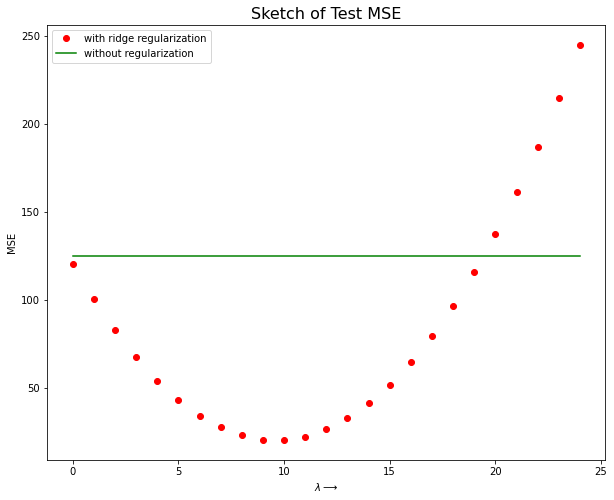

In [118]:
# MSE of Ridge and OLS
x5=np.linspace(0, 25, 25)
ridge_mse_test = []
for i in x5:
    temp = lambda i: (i-10)**2+20
    ridge_mse_test.append(temp(i))
    
ols_mse = np.repeat(125, 25)

# plot mse
plt.figure(figsize=(10, 8))
plt.plot(ridge_mse_test, 'ro')
plt.plot(ols_mse, color='g')
plt.title("Sketch of Test MSE", fontsize=16)
plt.xlabel("$\lambda\longrightarrow$")
plt.ylabel("MSE")
plt.legend(["with ridge regularization", "without regularization"])

# Question 6

## (a) 

False: In L2 regularization of linear regression, Ridge regression, the penalty term added to the objective function is proportional to the sum of the squares of the coefficients. This penalty term shrinks the coefficients towards zero, **but does not set them to zero.**


## (b) 

False: In leave-one-out cross-validation (LOOCV), for each model, we use all but one of the samples to train the model and use the remaining sample for validation. We repeat this process N times, using a different sample for validation each time, until all samples have been used for validation once. Therefore, for a dataset of size N, **LOOCV involves creating and training N models**, not N/2. 


## (c) 

False: A 95% confidence interval is a range of values calculated from a sample of data that is believed to contain the true population parameter with 95% probability. It is an estimate of the range of values that the **parameter is likely to fall within based on the observed data.**


## (d) 

False: In stepwise variable selection, we iteratively add or remove features to the model based on their individual contribution to the model's performance. We start with **an empty model and add one feature at a time.** In forward stepwise selection, we only need to train **one new model at each step.** Therefore, if K out of J features have already been selected, we only need to train one new model to select the next feature to add until we find best model with best metrics such as AIC. 

## (e) 

False: Conditional probabilities depend on the order of the events and the relationship between them. P(A|B) represents the probability of event A occurring given that event B has already occurred. The conditional probability P(B|A) represents the probability of event B occurring given that event A has already occurred.

For example, consider the events "it is raining" (A) and "there are clouds in the sky" (B). If we know that it is raining (A), then the probability of there being clouds in the sky (B) is very high. However, if we know that there are clouds in the sky (B), then the probability of it raining (A) is not necessarily high, since there could be clouds without rain.